(note: not working yet but only the example interpolation)

### Insert Hydro Estimator data to GLDAS

In [24]:
import xarray as xr
import numpy as np
from scipy import spatial

#### Reading GLDAS.nc data

In [25]:
f = '../example_data/GLDAS/FORCING/2019022600.LDASIN_DOMAIN1'
ds = xr.open_dataset(f)
lat = 21.241737
lon = -158.28706
variable = 'RAINRATE'

In [26]:
# get lat, lon, and var as numpy arrays
lats = ds.lat.values
lons = ds.lon.values
vals = ds[variable].values

In [67]:
ds

<xarray.Dataset>
Dimensions:     (Time: 1, south_north: 56, west_east: 72)
Dimensions without coordinates: Time, south_north, west_east
Data variables:
    lat         (south_north, west_east) float32 21.2417 21.2417 ... 21.7459
    lon         (south_north, west_east) float32 -158.307 -158.297 ... -157.612
    Times       |S20 ...
    valid_time  (Time) datetime64[ns] ...
    T2D         (Time, south_north, west_east) float64 ...
    Q2D         (Time, south_north, west_east) float64 ...
    U2D         (Time, south_north, west_east) float64 ...
    V2D         (Time, south_north, west_east) float64 ...
    PSFC        (Time, south_north, west_east) float64 ...
    RAINRATE    (Time, south_north, west_east) float64 6.376e-06 ... nan
    SWDOWN      (Time, south_north, west_east) float64 ...
    LWDOWN      (Time, south_north, west_east) float64 ...

#### The original RAINRATE DATA from GLDAS

In [27]:
rainrate = ds.RAINRATE

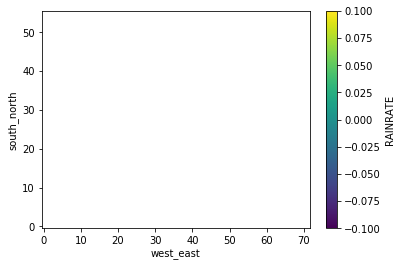

In [28]:
rainrate.plot()

#### Stack lat lon and index together

In [29]:
A = np.stack((np.ravel(lons), np.ravel(lats)), axis=-1)
KDTree = spatial.KDTree(A)

In [30]:
def nearest_coord(KDTree, pt):
    distance, idx = KDTree.query(pt)
    return (distance, idx)

In [31]:
distance, idx = nearest_coord(KDTree, (lon, lat))
i, j = np.unravel_index(idx, lons.shape)

#### Insert random data

In [32]:
import random

In [37]:
# insert random data
for i in range(0, 56, 5):
    for j in range (0, 72, 5):
        vals[0][i][j] = random.uniform(0., 0.0001)


# insert at i, j
#ds[variable].values = vals

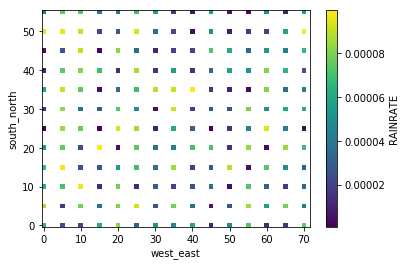

In [38]:
rainrate.plot()

#### interpolate the data

yufen: the interpolate doesn't work because it only has one point that has the value (=10) much larger than the rest of value (10-5E).

In [39]:
from scipy.interpolate import griddata
import matplotlib
import matplotlib.pyplot as plt

In [40]:
vals2d = vals[0]
pts = np.argwhere(~np.isnan(vals2d))
dat = [vals2d[tuple(pt)] for pt in pts]

In [41]:
x = np.linspace(0, 71, 72)
y = np.linspace(0, 55, 56)
X, Y = np.meshgrid(x, y)

grid = griddata(pts, dat, (Y, X), method='cubic')

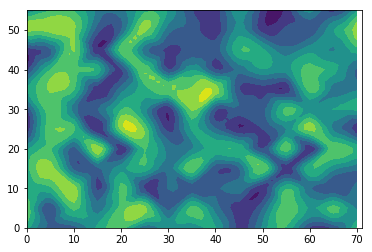

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.contourf(X, Y, grid)
plt.show()